
## Dicionário de dados

- CustomerID: Número de identificação do cliente/consumidor
- Gender: Identifica o gênero do cliente/consumidor
- Age: Representa a idade do cliente/consumidor
- Annual Income (k$): Representa a renda anual na casa de milhares de dólares
- Spending Score (1-100) Representa o escore designado pela empresa baseado no comportamento de gastos do cliente/consumidor

In [1]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Análise descritiva das variáveis que compõem o conjunto de dados

In [2]:
# Lendo o conjunto de dados
dados = pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")


#verificando as dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{dados.shape[1]} \nObservações: \t{dados.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	5 
Observações: 	200



In [3]:
#identificando os tipos de cada variável
display(dados.dtypes)

#5 primeiras entradas do conjunto de treino
dados.head()

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# porcentagem de valores ausentes

dados.isnull().mean().sort_values(ascending=False)

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [5]:
# Estatísticas do conjunto de dados para variáveis numéricas
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Estatísticas do conjunto de dados para variáveis categóricas
dados.describe(include=['O'])

,Genre
count,200
unique,2
top,Female
freq,112


In [7]:
# Renomeando as colunas do dataframe
print(f'Antes de renomear as colunas: {dados.columns}')
dados.columns = ['CustomerID', 'Genre', 'Age', 'AnnualIncome', 'SpendingScore']
print(f'Depois de renomear as colunas: {dados.columns}')

# Renomeando as categorias das variáveis qualitativas
dados['Genre'] = dados['Genre'].map({'Male': 'Masculino',  
                                 'Female': 'Feminino'})

Antes de renomear as colunas: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Depois de renomear as colunas: Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


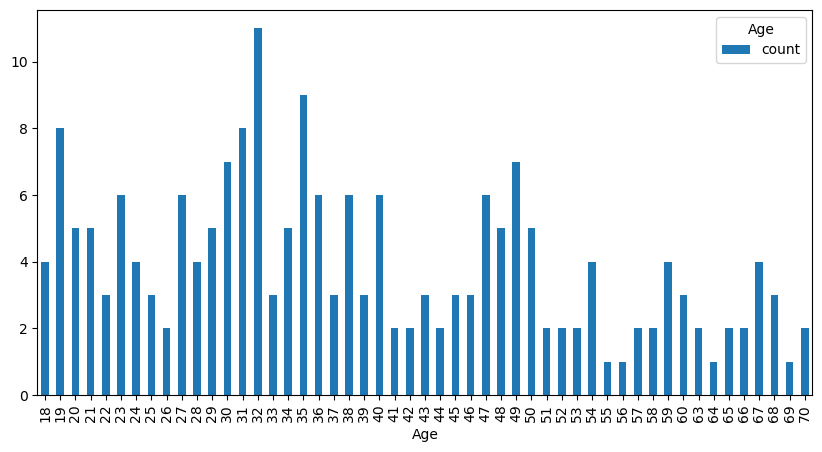

In [8]:
# ------------------
# Age
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Age'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (10, 5)
tab.plot.bar()
plt.legend(title='Age')

plt.show()

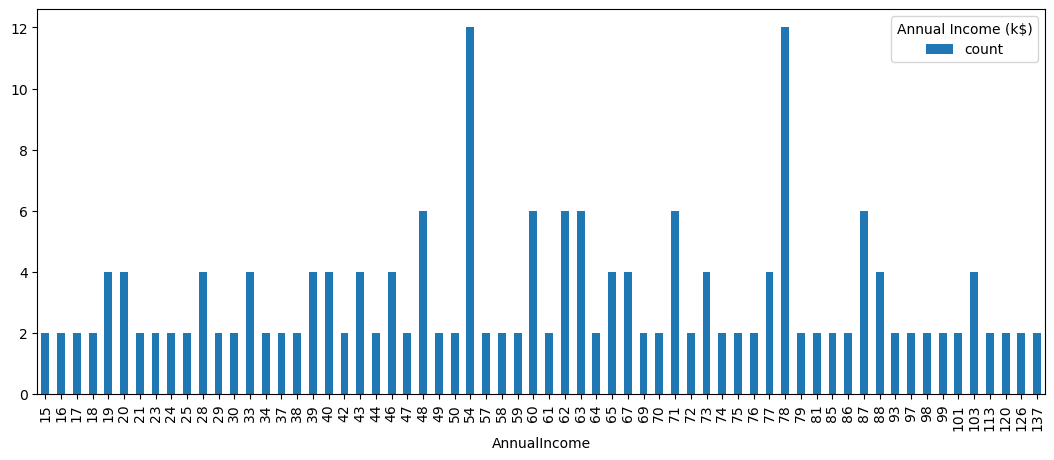

In [9]:
# ------------------
# Annual Income (k$)
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['AnnualIncome'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (13, 5)
tab.plot.bar()
plt.legend(title='Annual Income (k$)')

plt.show()

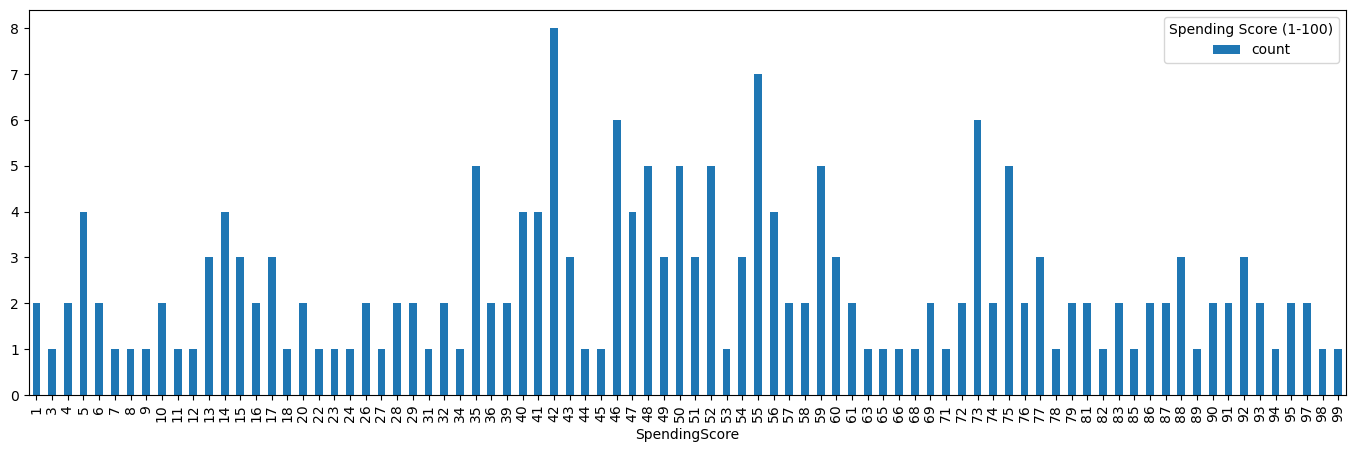

In [10]:
# ------------------
# Spending Score (1-100)
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['SpendingScore'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (17, 5)
tab.plot.bar()
plt.legend(title='Spending Score (1-100)')

plt.show()

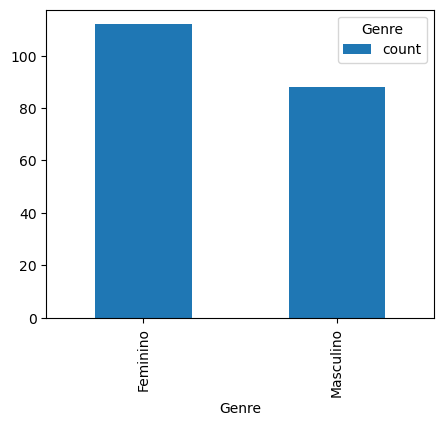

In [11]:
# ------------------
# Genre
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Genre'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (5, 4)
tab.plot.bar()
plt.legend(title='Genre')
plt.show()

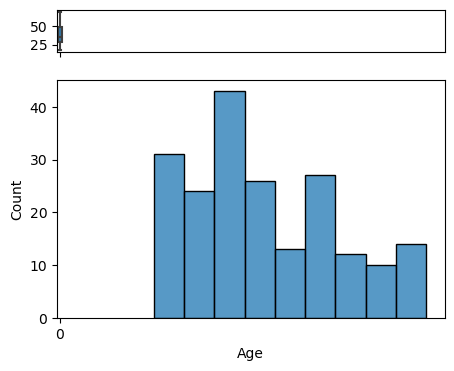

In [12]:
# ------------------
# Age
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['Age'], ax=ax_box)
sns.histplot(data=dados, x="Age", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

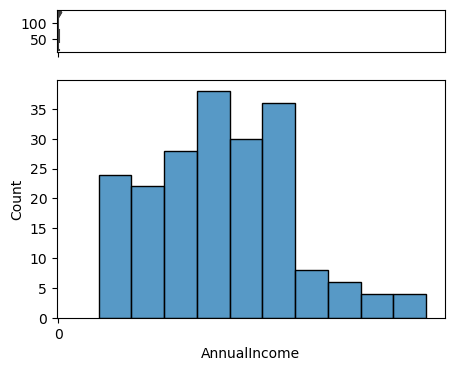

In [13]:
# ------------------
# Annual Income (k$)
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['AnnualIncome'], ax=ax_box)
sns.histplot(data=dados, x="AnnualIncome", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

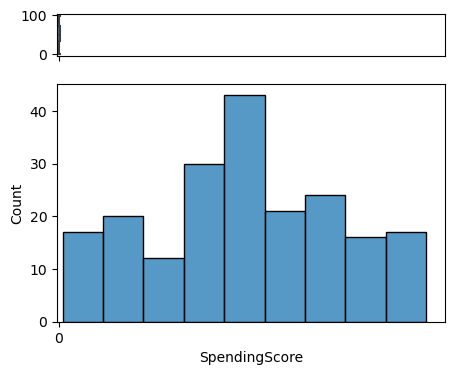

In [14]:
# ------------------
# Spending Score (1-100)
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['SpendingScore'], ax=ax_box)
sns.histplot(data=dados, x="SpendingScore", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

##  Análise de iteração entre as variáveis

### Análise de correlação entre as variáveis numéricas do conjunto de dados

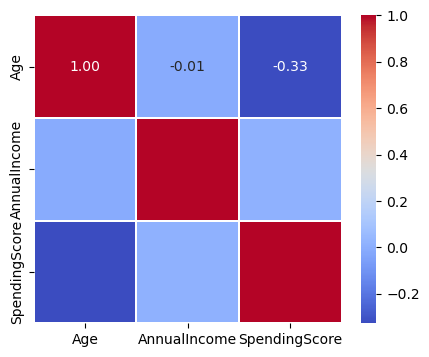

In [15]:
# Variáveis
quantitativas = ['Age', 'AnnualIncome', 'SpendingScore']

# plotar o heatmap para variáveis numéricas
sns.heatmap(dados[quantitativas].corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)
plt.rcParams["figure.figsize"] = (5, 4)

### Análise de distribuição entre as variáveis `Genre` e `SpendingScore` do conjunto de dados

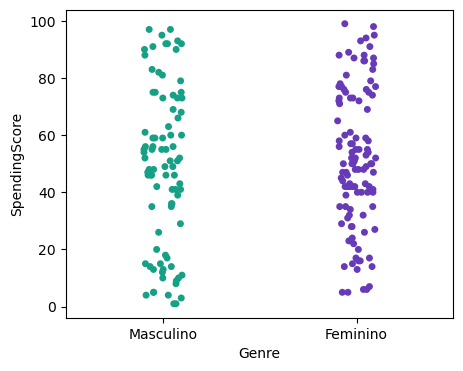

In [16]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.stripplot(data=dados,x='Genre',y='SpendingScore',palette=['#16A085','#673AB7']);

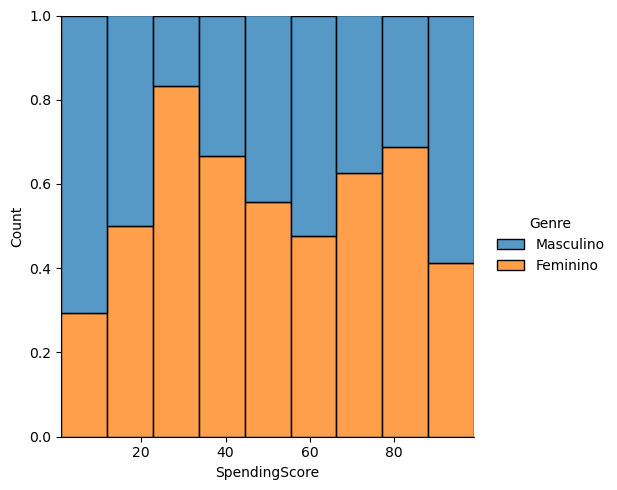

In [17]:
sns.displot(data=dados, x="SpendingScore", hue="Genre", multiple="fill")

### Análise de distribuição entre as variáveis `Genre` e `AnnualIncome` do conjunto de dados

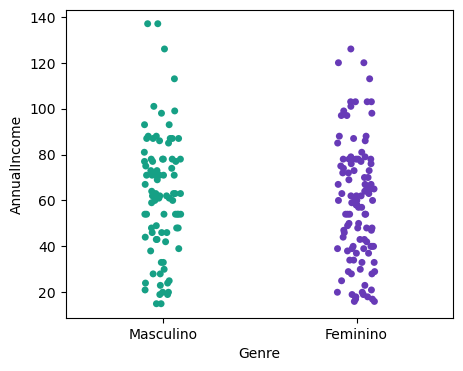

In [18]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.stripplot(data=dados,x='Genre',y='AnnualIncome',palette=['#16A085','#673AB7']);

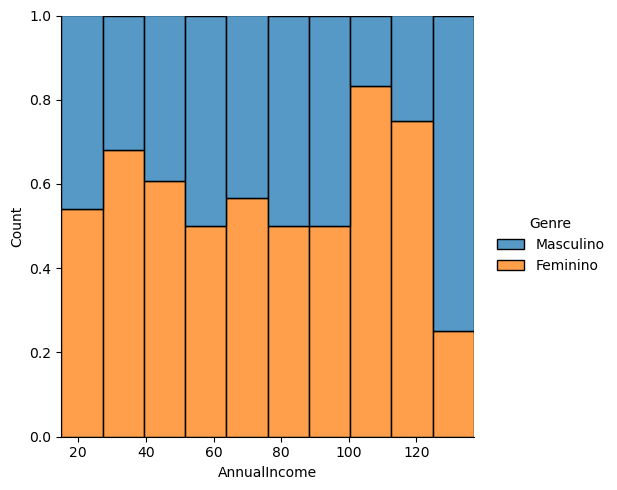

In [19]:
sns.displot(data=dados, x="AnnualIncome", hue="Genre", multiple="fill")

### Análise de distribuição entre as variáveis `Genre` e `Age` do conjunto de dados

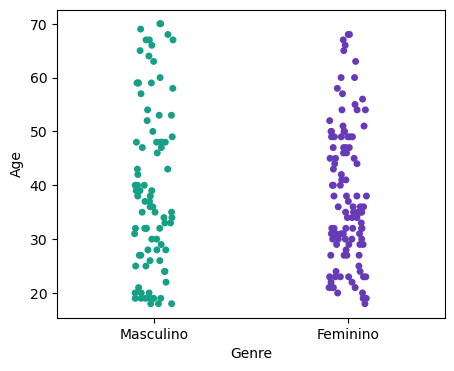

In [20]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.stripplot(data=dados,x='Genre',y='Age',palette=['#16A085','#673AB7']);

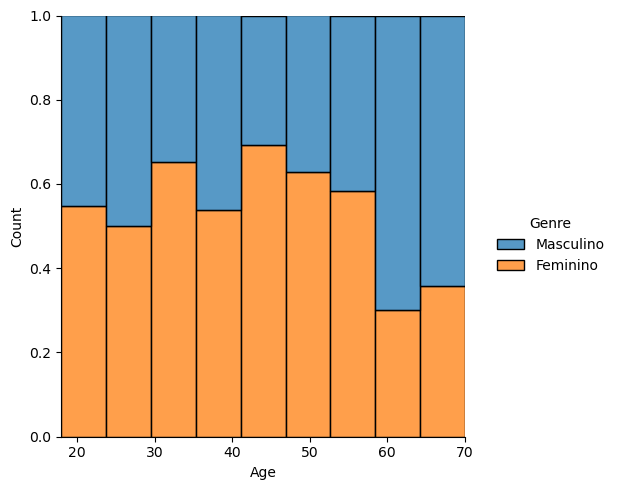

In [21]:
sns.displot(data=dados, x="Age", hue="Genre", multiple="fill")

## Análise de dispersão entre as variáveis `Spending Score`, `Annual Income`, e `Genre` do conjunto de dados

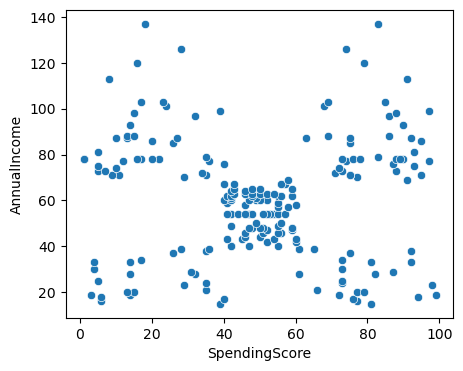

In [22]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='AnnualIncome');

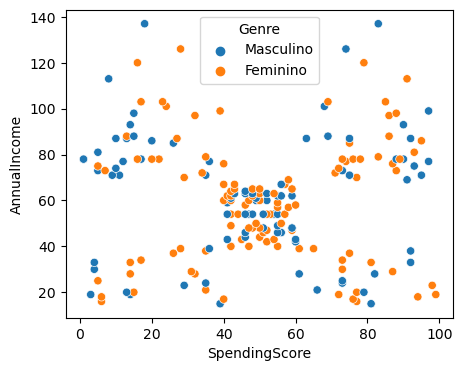

In [23]:
# Visualização através do atributo `Genre`
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='AnnualIncome', hue='Genre');

### Análise de dispersão entre as variáveis `Spending Score`, `Age`, e `Genre` do conjunto de dados

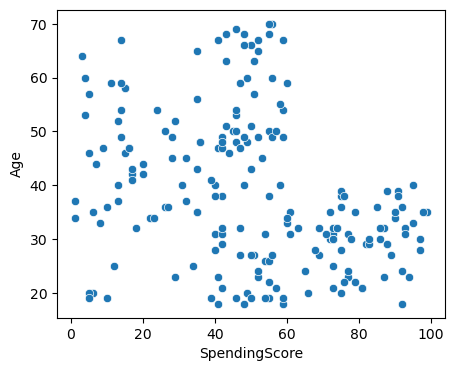

In [24]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='Age');

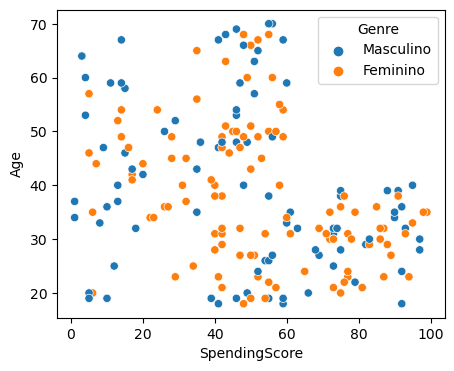

In [25]:
# Visualização através do atributo `Genre`
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='Age', hue='Genre');

### Análise de dispersão entre as variáveis `Annual Incomming` e `Age` do conjunto de dados

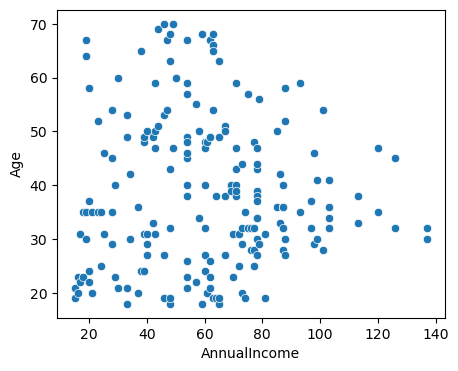

In [26]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='AnnualIncome', y='Age');

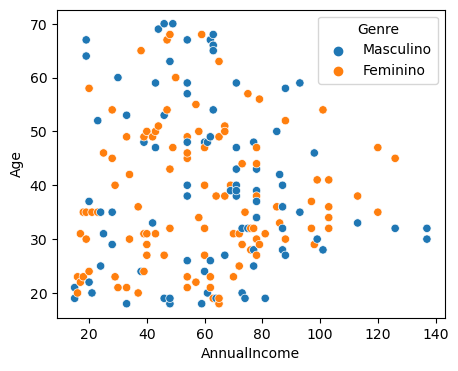

In [27]:
# Visualização através do atributo `Genre`
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='AnnualIncome', y='Age', hue='Genre');

### Pairplot entre variáveis de interesse

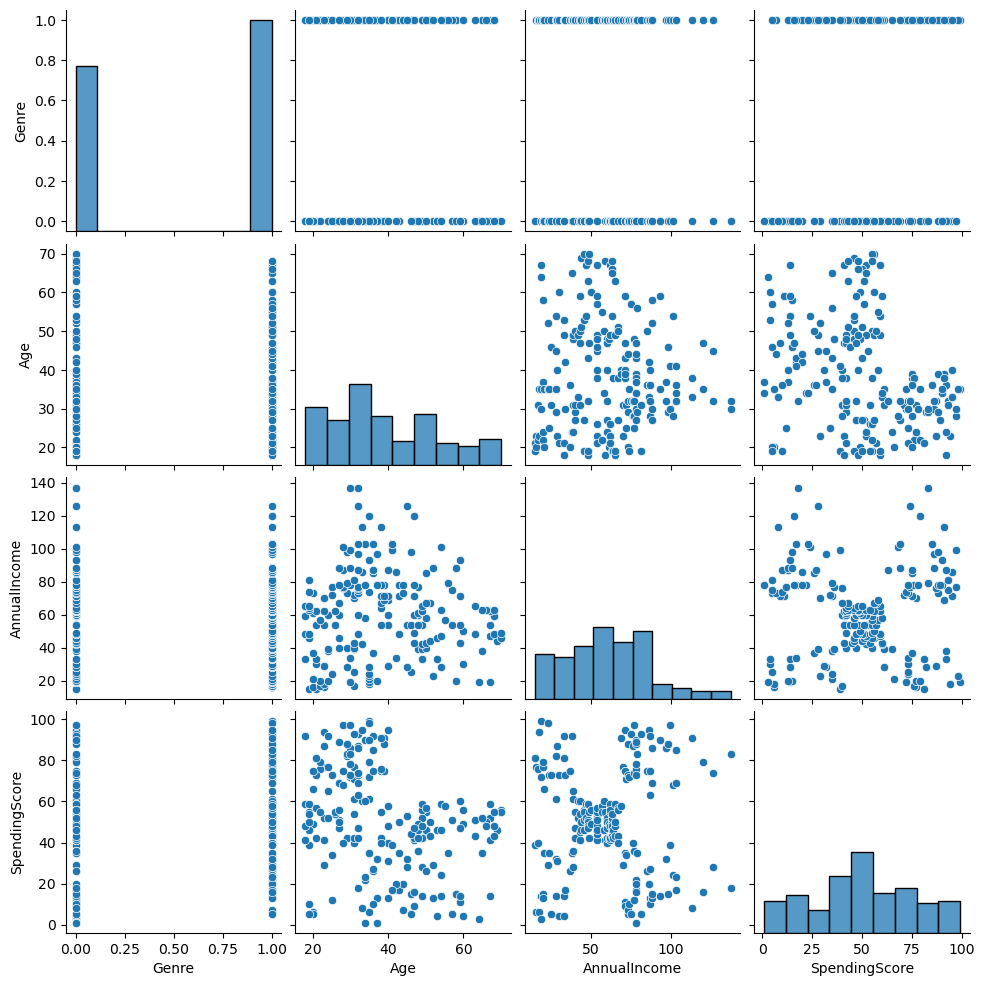

In [28]:
# Variáveis de interesse
df = dados.copy(deep=True)
df.drop(['CustomerID'], axis=1, inplace=True)

# Codificando as variáveis categoricas para valores numéricos
df['Genre'] = df['Genre'].map({'Masculino':0,  
                           'Feminino':1})

sns.pairplot(df)

### Pairplot entre variáveis de interesse `

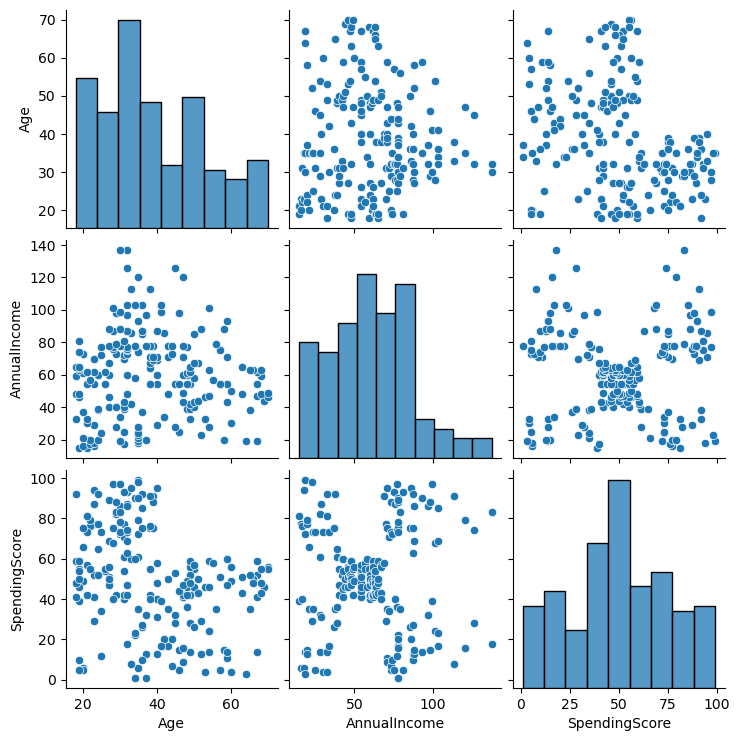

In [30]:
# Variáveis de interesse
df = dados.copy(deep=True)
df.drop(['CustomerID', ], axis=1, inplace=True)

sns.pairplot(df)

## Tratamento de valores ausentes e remoção/substituição dos valores ausentes no conjunto de dados.

In [31]:
# Verificar os dados ausentes
dados.isnull().sum()

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

## Transformação de variáveis: criar novas features, aplicar one-hot encoding nas variáveis categóricas, discretizar variáveis contínuas.

In [32]:
# converter Genre em 0 e 1
dados['Genre'] = dados['Genre'].map({'Masculino': 0, 'Feminino': 1})
dados.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [33]:
# Aplicar o one-hot encoding é bem simples
dados = pd.get_dummies(dados)
dados.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [34]:
# Padronização de Valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dados)
dados = pd.DataFrame(scaler.transform(dados), columns=dados.columns)

dados.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,-1.723412,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,0.886405,-0.563369,-1.662660,-0.395980


## 4.1 - Treinar e comparar diferentes metodologias

### Seleção de Features

In [35]:
# Vamos colocar em variavel quais são nossas features que utilizaremos para o treinamento dos modelos
# No nosso caso

customer_id_feature = 'CustomerID'
features = list(dados.columns)
features.remove(customer_id_feature)

print('Features Utilizadas:', features)

Features Utilizadas: ['Genre', 'Age', 'AnnualIncome', 'SpendingScore']


In [36]:
# Conjunto a ser utilizado para segmentação
X = dados[features].copy(deep=True)

### Criando grupos com K-Means

In [37]:
# Importando modelo da pacote scikit-learn
from sklearn.cluster import KMeans
from sklearn import metrics

# Criando lista com todos os números de clusters que queremos testar
n_clusters = np.arange(2, 21) # Array de 1 a 10

# Criando uma lista para guardarmos os resultados
resultados_silhouette = []
resultados_harabasz = []
resultados_bouldin = []
resultados_wcss = []

# Para cada numero de clusters
for k in n_clusters:
    # Criamos um modelo novo e treinamos ele
    clf = KMeans(n_clusters=k)
    clf.fit(X)

    # Extraindo os rotulos definidos pelo modelo
    labels = clf.labels_
    
    # Calculando o valor da silhoueta
    silhouette_res = metrics.silhouette_score(X, labels, metric='euclidean')
    # Calculando o valor do indice Calinski-Harabasz
    harabasz_res = metrics.calinski_harabasz_score(X, labels)
    # Calculando o valor do indice Davies-Bouldin
    bouldin_res = metrics.davies_bouldin_score(X, labels)
    
    
    # Salvando a acurácia para o numero atual de vizinhos
    resultados_silhouette.append(silhouette_res)
    resultados_harabasz.append(harabasz_res)
    resultados_bouldin.append(bouldin_res)
    # Salvando o valor de Within-Cluster-Sum of Squared Error 
    resultados_wcss.append(clf.inertia_)

C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

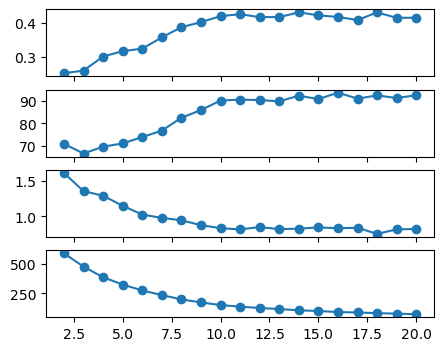

In [38]:
fig, axs = plt.subplots(4, 1, sharex=True)
axs[0].plot(n_clusters, resultados_silhouette, '-o')
axs[1].plot(n_clusters, resultados_harabasz, '-o')
axs[2].plot(n_clusters, resultados_bouldin, '-o')
axs[3].plot(n_clusters, resultados_wcss, '-o')

Levando em consideração que, para as primeiras 2 métricas, quanto maior o valor melhor, e para as 2 últimas métricas, quanto menor o valor melhor, com **10 clusters**, obtemos um bom valor para as 4 métricas utilizadas.

In [39]:
# Melhor K=10

# cria um modelo k-Means com melhor K
clf_kmeans = KMeans(n_clusters=10)

# treinamento do modelo
clf_kmeans.fit(X)

# rotulagem
labels_kmeans = clf_kmeans.labels_

# Calculando o valor da silhoueta
silhouette_kmeans = metrics.silhouette_score(X, labels, metric='euclidean')
# Calculando o valor do indice Calinski-Harabasz
harabasz_kmeans = metrics.calinski_harabasz_score(X, labels)
# Calculando o valor do indice Davies-Bouldin
bouldin_kmeans = metrics.davies_bouldin_score(X, labels)
# Extraindo o valor de Within-Cluster-Sum of Squared Error
wcss_kmeans = clf.inertia_

print(f'Sillhouette Score: {silhouette_kmeans}\n'\
f'Calinski-Harabasz Index: {harabasz_kmeans}\n'\
f'Davies-Bouldin Index: {bouldin_kmeans}\n'\
f'WCSS Score: {wcss_kmeans}\n')

C:\Users\Felipe Saldanha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Sillhouette Score: 0.41612587915880744
Calinski-Harabasz Index: 92.33914115614895
Davies-Bouldin Index: 0.8217960767732938
WCSS Score: 74.4400063658556



### Visualizando os dados via Dendograma

In [40]:
# Definição de método para criação do gráfico de dendograma
def plot_dendogram(X, method):
    plt.figure(figsize=(14,5))
    dendrogram(linkage(X, method))
    plt.show(True)

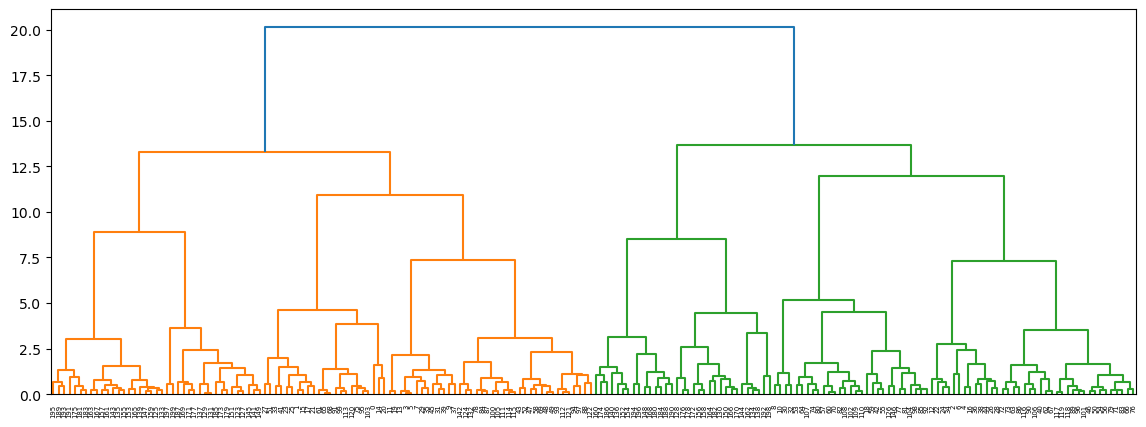

In [41]:
plot_dendogram(X, 'ward')

##  Interpretar o conjunto de características de cada grupo - Abordagem Analítica


In [42]:
# Criando coluna contendo o identificador do grupo pertencente a cada registro
dados_rotulados = dados.copy(deep=True)

dados_rotulados['rotulo'] = labels_kmeans

In [43]:
df_mean = dados_rotulados.groupby('rotulo').mean()

In [44]:
df_mean

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
rotulo,,,,,
0,1.088319,0.886405,-0.477932,0.972848,1.221585
1,-0.287124,0.886405,1.098306,-0.241583,-0.048079
2,1.038281,-1.128152,-0.399900,1.013441,1.260407
3,-0.769329,-1.128152,-0.976027,-0.737052,0.416038
4,-0.499636,-1.128152,1.435058,-0.452983,-0.401952
5,-0.140298,0.886405,-0.781539,-0.122142,-0.119570
6,1.049727,-1.128152,-0.027007,0.967012,-1.397168
7,1.233483,0.886405,0.354220,1.249122,-1.147454
8,-1.346353,0.886405,-0.960846,-1.330880,1.177786


<Axes: xlabel='rotulo'>

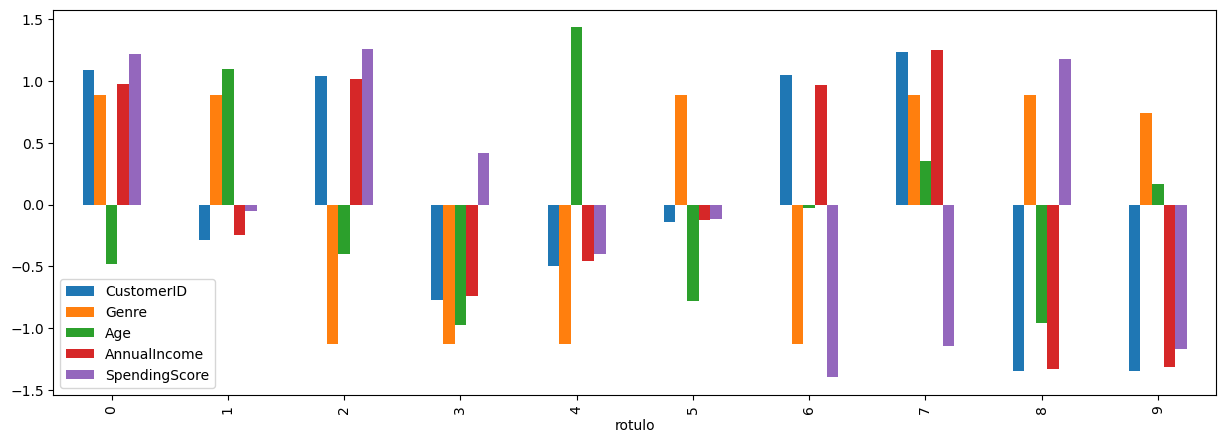

In [45]:
plt.rcParams["figure.figsize"] = (15, 5)
df_mean.plot.bar()

##  Interpretar o conjunto de características de cada grupo - Abordagem Supervisionada


In [47]:
# Importando o classificador
from sklearn.tree import DecisionTreeClassifier

# cria uma decision tree
clf_tree = DecisionTreeClassifier(max_depth=3)

# ajuste do modelo sob os dados rotulados
clf_tree.fit(X, labels_kmeans)

DecisionTreeClassifier(max_depth=3)

In [51]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

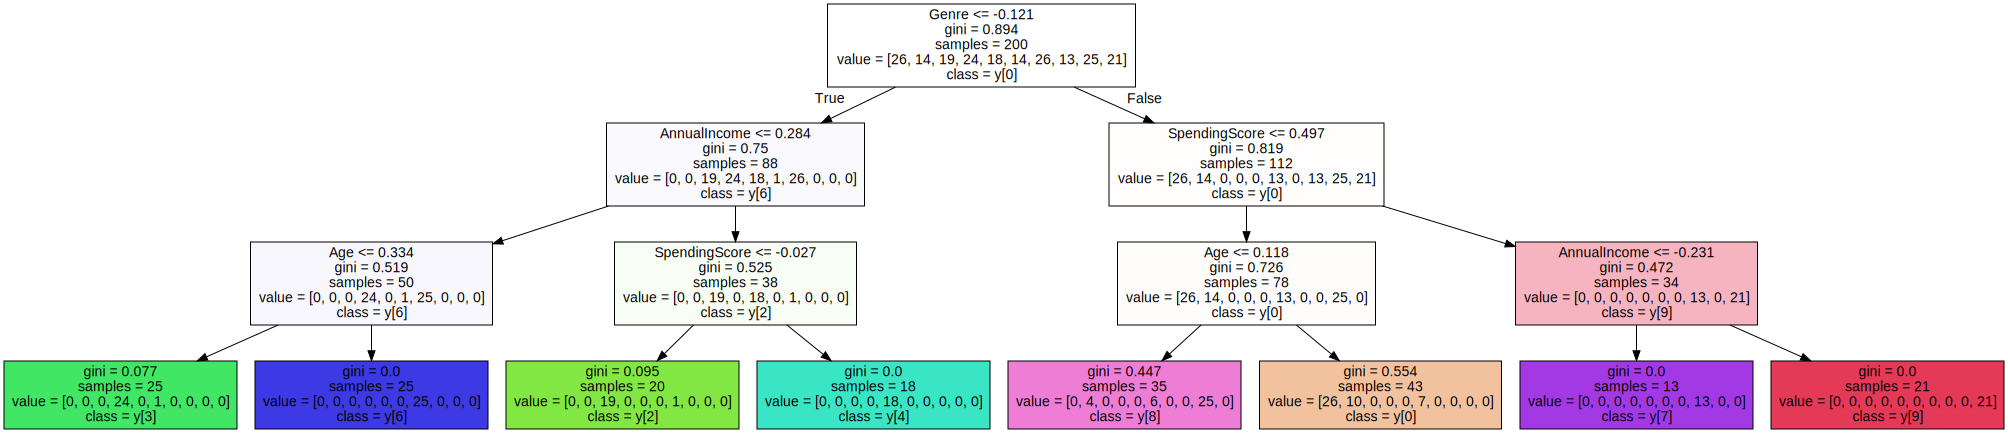

In [ ]:
graph

### Salvando o modelo desenvolvido

In [52]:
import pickle

labels_antes_salvar = clf_kmeans.predict(X)

# Salvando o modelo em um arquivo
pickle.dump(clf_kmeans, open("modelo.pickle.dat", "wb"))

### Carregando o modelo desenvolvido

In [53]:
import pickle

# Carregando o modelo do arquivo
loaded_model = pickle.load(open("modelo.pickle.dat", "rb"))

In [54]:
labels_depois_carregar = loaded_model.predict(X)

In [55]:
labels_antes_salvar == labels_depois_carregar

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,